In this report, we are going to apply PCA to the Titanic dataset. The original dataset has been split into two parts: training data and testing data. We are going to combine them into one large dataset and use PCA() function. Eventually, we are going to get 2 principle components to classify the target variable: Survived.

In [1]:
# Step 1: Import the required modules
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# Step 2: Preperation - import training and testing data and append them into one dataframe

df_train = pd.read_csv("/Users/yuyizhang/FCR/NEU/CPS/Analytics_2018/EAI 6000_Fundamentals of Artificial Intelligence/Week 2/Titanic/train_data.csv", index_col=0)
df_test = pd.read_csv("/Users/yuyizhang/FCR/NEU/CPS/Analytics_2018/EAI 6000_Fundamentals of Artificial Intelligence/Week 2/Titanic/test_data.csv", index_col=0)

df = pd.concat([df_train, df_test], ignore_index=True)


## get to see the shape of dataframes and first five lines
print('df:', df.shape) 
df.head()




df: (892, 16)


,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


As we can see from above, we've got a dataset of 892 people by 16 features. We are also seeing the first 5 rows of the dataset. Now we are going to center and scale the data using mean() and std() functions in NumPy. Then we store the preprocessing value in 'scaled_df'.

In [3]:
# Step 3: center and scale the data

np.mean(df),np.std(df)
scaled_df = preprocessing.scale(df)

In [4]:
# Step 4: create PCA object and print out PC1, PC2

pca = PCA(2)
pca.fit(scaled_df)
pca_ay = pca.transform(scaled_df)
pca_ay

array([[-1.62928445, -0.96761115],
       [ 2.15899685,  2.72899004],
       [ 1.9896634 , -1.9993752 ],
       ...,
       [ 1.43024056, -2.15068871],
       [ 0.90878665,  2.63619646],
       [-1.17341109, -0.71862835]])

In Step 4, we called out PCA() function and set up the number of the components into 2. Then fit in the scaled data. Now we got the top two components (PC1 and PC2) in size 892 by 2.

In [5]:
## print out the coefficients of two PCs

print(pca.explained_variance_)

[3.15936799 2.62266657]


So the new coefficients, or so-called eigenvalues are 3.16 and 2.62, respectively.

In [6]:
## print out the weights of PCs

print(pca.components_)

[[-0.03829302  0.37600632 -0.43050498 -0.11326546  0.27503357  0.22064917
  -0.02509375 -0.16956316  0.14891212 -0.43730772  0.07670616  0.06421002
   0.42584161  0.2071064   0.07089297 -0.22934438]
 [ 0.06519054  0.08438144  0.08234796  0.38919404  0.30054074  0.45265709
   0.04657223 -0.42777182 -0.19130409  0.30777079  0.05824089 -0.22546571
  -0.22761474  0.25724211 -0.18303573 -0.11386375]]


We could use the PC weights to see if there is a correlation between or among features. For example, weights for Title_1(-0.4373) and Title_4(0.4258) are additive inverse. This means they are negatively related. In this dataset, Title_1 to Title_4 signify marriage status(Mr, Ms, Master, and Miss). That explains why Title_1(Mr.) and Title_4(Miss) are inverses. Also Title_1(-0.4373) and Sex(-0.4305) have similar numbers. That's because values in Sex column 0, 1 refers to Male and Female. Pclass_3(-0.1696) and Family_size(0.1489) are nearly additive inverse. P-class refers to Passenger Class. So this finding indicates that big families tend to buy C Class fares.

Besides, we also found some fun facts. Emb_# refers to 3 embarked locations, which are Southampton, Cherbourg, and Queenstown. Emb_2(0.0709) has a similar number as Title_2(0.0767), which indicates female passengers embarked from Cherbourg. Emb_1(0.2071) has a similar number as Pclass_1(0.2206), which indicates many first-class passengers embarked on Southampton. It makes sense since 70% of the people boarded from Southampton.

In [7]:
# Step 5: create PCA scatter plot

## first of all, change the values in Survived column from 0,1 format to 'Survived' and 'Not Survived' by .replace function.
df['Survived'].replace(1,'Survived', inplace = True)
df['Survived'].replace(0,'Not Survived', inplace = True)
df.head() 

,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,1,Not Survived,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,2,Survived,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,3,Survived,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,4,Survived,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,5,Not Survived,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


<Figure size 432x288 with 0 Axes>

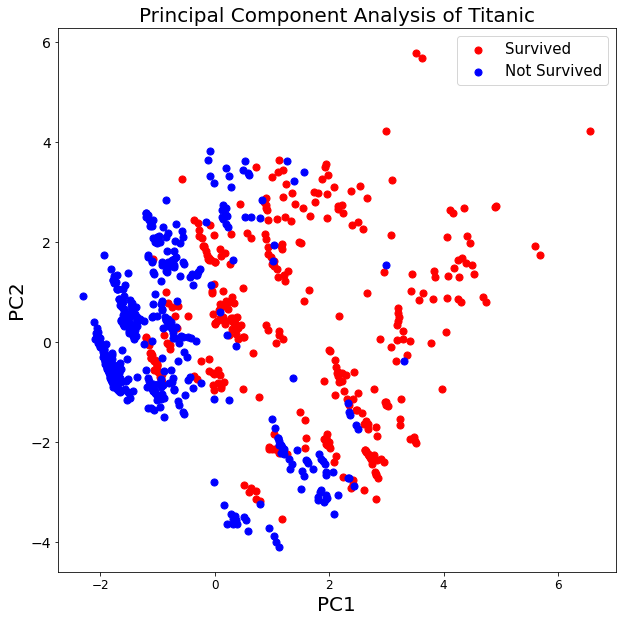

In [8]:
## plot the visualization of all samples in label of PC1 and PC2 axis. 

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis of Titanic",fontsize=20)
targets = ['Survived', 'Not Survived']
colors = ['r', 'b']
pca_df = pd.DataFrame(pca_ay, columns = ['PC1', 'PC2'])
for target, color in zip(targets,colors):
    indicesToKeep = df['Survived'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'PC1']
               , pca_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

From the scatter plot above we can see that the two classes 'Survived' and 'Not Survived' are not well linearly split. Actually, when we calculated the variation ratio below we could see that PC1 and PC2 only hold 19.7% and 16.4% of the information. But we could roughly figure that blue spots tend to be at the down-left corner while the red spots spread to the up-right. 

In [9]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.19723913 0.1637329 ]


In [26]:
scaled_df[0]

array([-1.73083273, -0.78855449,  0.73705671, -0.56456846, -0.50258253,
       -0.56526686, -0.51153595,  0.90371489,  0.05981176,  0.58080232,
       -0.07507981, -0.2166757 , -0.50280114, -0.48170966, -0.3073736 ,
        0.6188261 ])

In [18]:
pca.components_[0]

array([-0.03829302,  0.37600632, -0.43050498, -0.11326546,  0.27503357,
        0.22064917, -0.02509375, -0.16956316,  0.14891212, -0.43730772,
        0.07670616,  0.06421002,  0.42584161,  0.2071064 ,  0.07089297,
       -0.22934438])

In [28]:
pca_ay[0]

array([-1.62928445, -0.96761115])

In [30]:
sum(scaled_df[0] * pca.components_[0])

-1.6292844472999748